# Caracterização de eletrofáceis por meio de inteligência artificial com abordagem supervisionada
## Análise dos registros de litologias nos diferentes membros

- **Nome do Arquivo**: treinamento_modelo.ipynb
- **Autor**: Rafael Takeguma Goto
- **Versão**: 1.0
- **Data de Criação**: 05/07/2024
- **Data de Modificação**: 05/07/2024

### Descrição: 
Este notebook contém o a etapa do trabalho referente à análise dos registros de litologias nas diferentes unidades Membro existentes.

### Leitura do conjunto de dados

O conjunto de dados é constituído por arquivos csv gerados a partir da fusão da extração dos arquivos dlis com os arquivos agp de cada poço.

### Leitura do conjunto de dados

O conjunto de dados é constituído por arquivos csv gerados a partir da fusão da extração dos arquivos dlis com os arquivos agp de cada poço.

In [1]:
import glob
import pandas as pd

leituras = []      # Armazena as leituras dos arquivos .csv
nomes = []          # Armazena os nomes obtidos das leituras

for file in glob.glob(r'**/Dados-filtrados' + "/*.csv", recursive=True):
    try:
        # Salva os dados da leitura
        leitura = pd.read_csv(f'{file}')
        leituras.append(leitura)

        # Salva o nome do poço
        nomes.append(file[23:26])
    except:
        print(file)

In [2]:
# Casa itens da lista 'nomes' com os itens da lista 'leituras'
pares = zip(nomes, leituras)

# Cria dicionário 'dados'
dados = dict(pares)

### Litologias existentes

O conjunto de dados é constituído por 12 diferentes tipos de litologias.

In [3]:
# Faz leitura dos dados concatenados
dados_concatenados_leitura = pd.read_csv('arquivos-secundarios\pocos_filtrados.csv')

# Cria um dataframe pandas para os dados concatenados
dados_concatenados = pd.DataFrame(dados_concatenados_leitura)

# armazena as diferentes litologias existentes na variável 'litologias'
litologias = dados_concatenados['Litologia'].unique()

# printa as diferentes litologias
for litologia in litologias:
    print(litologia)

# atribui uma cor a cada litologia para usarmos no gráfico (tentei buscar cores semelhantes ao perfil composto)
litologias_cores = {
    'FOLHELHO': 'lime',
    'CALCILUTITO': 'cyan',
    'ARENITO': 'yellow',
    'ANIDRITA': 'fuchsia',
    'SILTITO': 'brown',
    'CONGLOMERADO': 'gold',
    'METAMORFICA NAO IDE': 'gray',
    'CALCARENITO': 'royalblue',
    'DOLOMITO': 'darkturquoise',
    'GRANITO': 'red',
    'FILITO': 'forestgreen',
    'XISTO': 'salmon'
}

FOLHELHO
CALCILUTITO
ARENITO
ANIDRITA
SILTITO
CONGLOMERADO
METAMORFICA NAO IDE
CALCARENITO
DOLOMITO
GRANITO
FILITO
XISTO


### Número de registros de cada poço

In [4]:
registros = {}      # Dicionário para armazenar o número de registros de cada poço
total = 0

for key, poco in dados.items():
    registros[key] = poco.shape[0]
    total += poco.shape[0]

### Renomear abreviaturas

In [5]:
for key, value in dados.items():
    # renomeia abreviaturas das unidades formação
    value.loc[value['UnidadeF'] == 'COTING', 'UnidadeF'] = 'COT'
    value.loc[value['UnidadeF'] == 'SERRAR', 'UnidadeF'] = 'SER'
    value.loc[value['UnidadeF'] == 'BATING', 'UnidadeF'] = 'BAT'
    value.loc[value['UnidadeF'] == 'ARACAR', 'UnidadeF'] = 'ARA'
    value.loc[value['UnidadeF'] == 'PENEDO', 'UnidadeF'] = 'PDO'
    value.loc[value['UnidadeF'] == 'RIACHU', 'UnidadeF'] = 'RIA'
    value.loc[value['UnidadeF'] == 'BANANE', 'UnidadeF'] = 'BAN'
    value.loc[value['UnidadeF'] == 'MURIBE', 'UnidadeF'] = 'MUR'
    value.loc[value['UnidadeF'] == 'EMBASA', 'UnidadeF'] = 'EMB'

    # renomeia abreviaturas das unidades membro
    value.loc[value['UnidadeM'] == 'SAPUCA', 'UnidadeM'] = 'SAP'
    value.loc[value['UnidadeM'] == 'SERRAR', 'UnidadeM'] = 'SER'
    value.loc[value['UnidadeM'] == 'ARACAR', 'UnidadeM'] = 'ARA'
    value.loc[value['UnidadeM'] == 'BATING', 'UnidadeM'] = 'BAT'
    value.loc[value['UnidadeM'] == 'PENEDO', 'UnidadeM'] = 'PDO'
    value.loc[value['UnidadeM'] == 'BANANE', 'UnidadeM'] = 'BAN'
    value.loc[value['UnidadeM'] == 'EMBASA', 'UnidadeM'] = 'EMB'
    value.loc[value['UnidadeM'] == 'TAQUAR', 'UnidadeM'] = 'TQR'
    value.loc[value['UnidadeM'] == 'MARUIM', 'UnidadeM'] = 'MAR'
    value.loc[value['UnidadeM'] == 'ANGICO', 'UnidadeM'] = 'ANG'
    value.loc[value['UnidadeM'] == 'OITEIR', 'UnidadeM'] = 'OIT'
    value.loc[value['UnidadeM'] == 'IBURA', 'UnidadeM'] = 'IBU'
    value.loc[value['UnidadeM'] == 'CARMOP', 'UnidadeM'] = 'CPS'

### Função para criar gráfico de barra horizonatal

In [6]:
import matplotlib.pyplot as plt

def criar_grafico_barra_horizontal(ax, x, y, titulo, subtitulo, rotulo_x, rotulo_y, cor):
    """
    Cria um gráfico de barras horizontal.

    Parâmetros:
    - ax: objeto Axes onde o gráfico será desenhado.
    - x: valores no eixo x (largura das barras).
    - y: valores no eixo y (posição das barras).
    - titulo: título do gráfico.
    - subtitulo: subtítulo do gráfico (pode ser None).
    - rotulo_x: rótulo do eixo x.
    - rotulo_y: rótulo do eixo y.
    - cor: cor das barras.
    - figsize: tamanho da figura (largura, altura), padrão (8, 5).
    """
    
    ax.barh(y, x, edgecolor='black', color=cor, zorder=2)

    # Muda a cor dos eixos
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_color('gray')       

    # Remove os tracinhos dos eixos
    ax.tick_params(axis='x', which='both', bottom=False, top=False)  
    ax.tick_params(axis='y', which='both', left=False, right=False)  

    # Adiciona um grid
    ax.grid(True, axis='x', zorder=0)

    # Título do gráfico
    plt.suptitle(titulo, fontsize=14, fontweight='bold')

    # Subtítulo do gráfico
    if subtitulo:
        ax.set_title(subtitulo, fontsize=10)

    # Rótulos x e y
    ax.set_xlabel(rotulo_x, fontweight='bold')
    ax.set_ylabel(rotulo_y, fontweight='bold')

### Número de registros por membro

In [7]:
# Função para contar todas as combinações existentes na hierarquia de formação e membro
def count_all_combinations(df, formacao, membro):
    combinations = df.groupby([formacao, membro]).size()
    combinations_dict = {f"{a}_{b}": count for (a, b), count in combinations.items()}
    return combinations_dict

### Número de registros Litologia x Membro

In [8]:
# Função para contar todas as combinações existentes da hierarquia Formação_Membro com uma litologia específica
def count_combinations_litologia(df, litologia):
    filtered_df = df[df['Litologia'] == litologia]
    combinations = filtered_df.groupby(["UnidadeF", "UnidadeM"]).size()
    combinations_dict = {f"{a}_{b}": count for (a, b), count in combinations.items()}
    return combinations_dict

In [9]:
# Função para contar todas as combinações existentes da hierarquia Formação_Membro com uma litologia específica em todo o dicionário 'dados'
def count_all_combinations_litologia(df_dict, litologia):
    total_combinations = {}
    
    for df in df_dict.values():
        filtered_df = df[df['Litologia'] == litologia] 
        combinations = filtered_df.groupby(["UnidadeF", "UnidadeM"]).size()
        for (a, b), count in combinations.items():
            key = f"{a}_{b}"
            if key in total_combinations:
                total_combinations[key] += count
            else:
                total_combinations[key] = count
    
    return total_combinations

In [10]:
def criar_grafico_registros_litologia_membro(poco, litologia, cor):
    countsFM = count_combinations_litologia(dados[poco], litologia)

    formacoes = list(countsFM.keys())
    registros = list(countsFM.values())

    titulo = f"Número de Registros de {litologia} por Membro ({poco})"
    rotulo_X = f"Número de Registros de {litologia}"
    
    fig, ax = plt.subplots(figsize=(8,5))
    criar_grafico_barra_horizontal(ax, registros, formacoes, titulo, "", rotulo_X, "Membro", cor)

    return fig

In [11]:
def criar_grafico_todos_registros_litologia_membro(df_dict, litologia, cor):
    countsFM = count_all_combinations_litologia(df_dict, litologia)

    formacoes = list(countsFM.keys())
    registros = list(countsFM.values())

    titulo = f"Registros de {litologia} por Membro (Todos os Poços)"
    rotulo_X = f"Número de Registros de {litologia}"

    fig, ax = plt.subplots(figsize=(8,5))
    criar_grafico_barra_horizontal(ax, registros, formacoes, titulo, "", rotulo_X, "Membro", cor)
    
    return fig

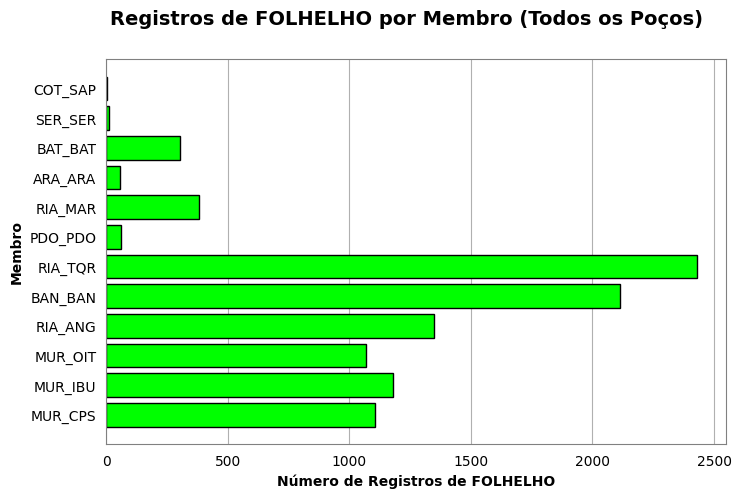

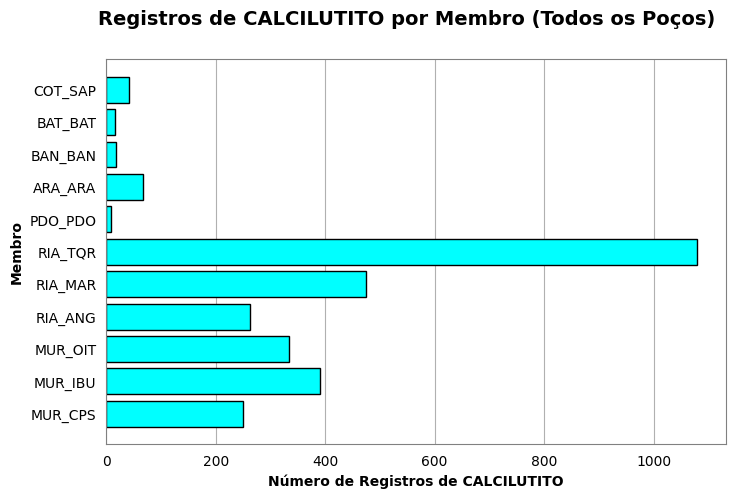

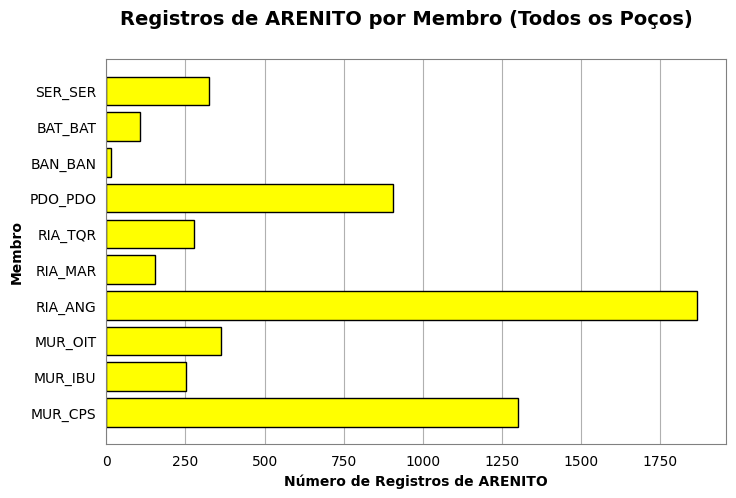

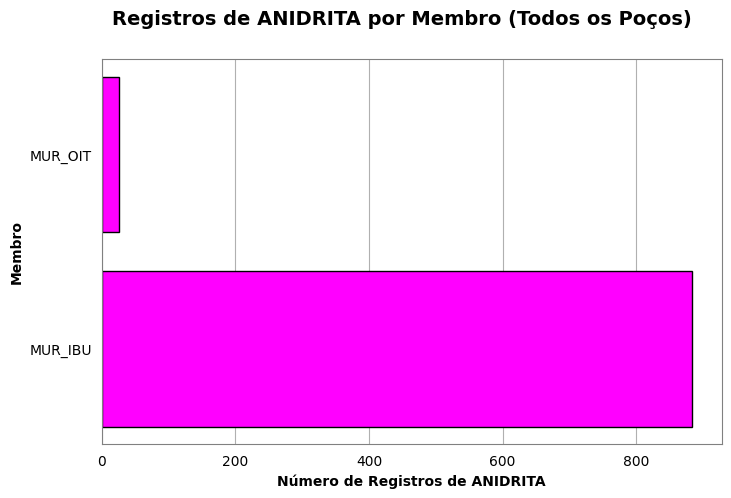

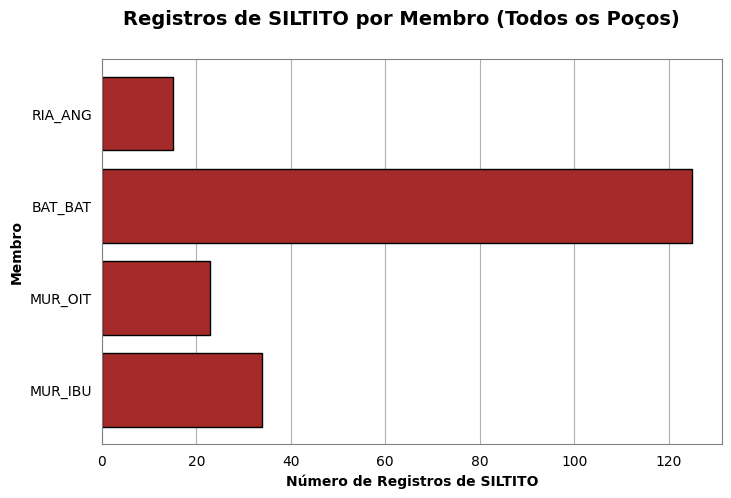

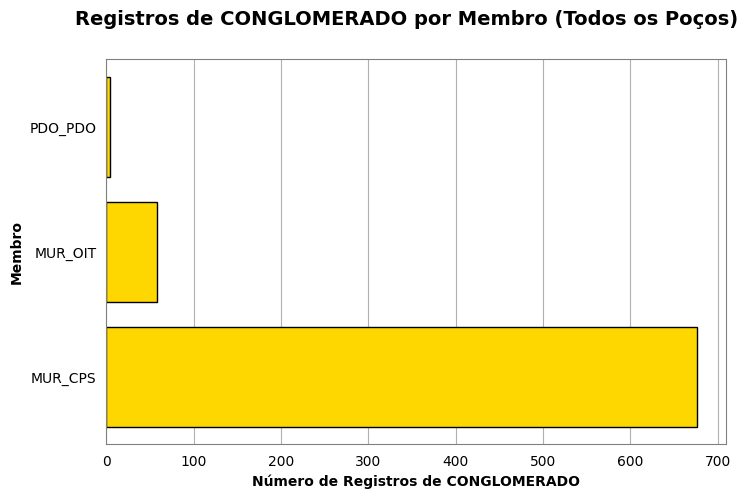

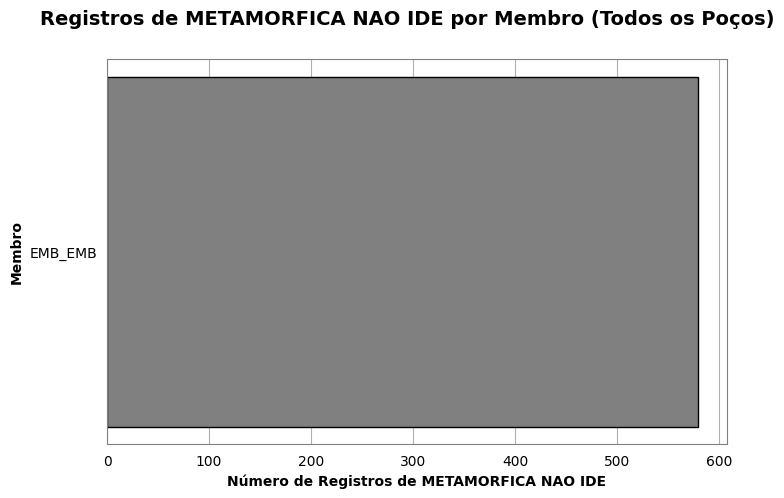

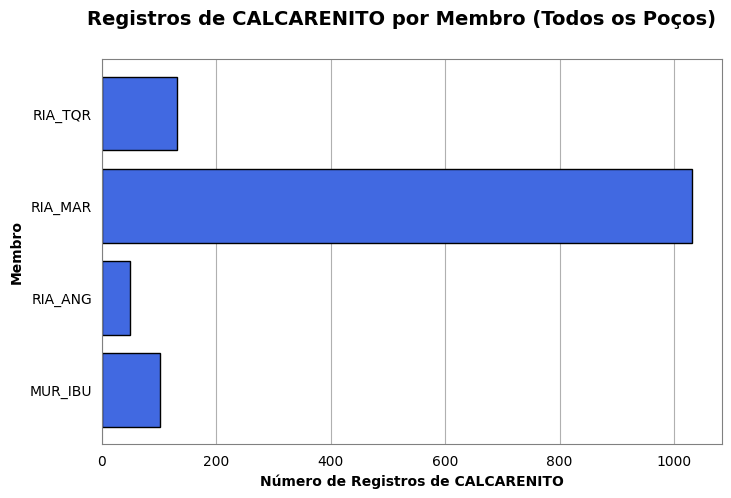

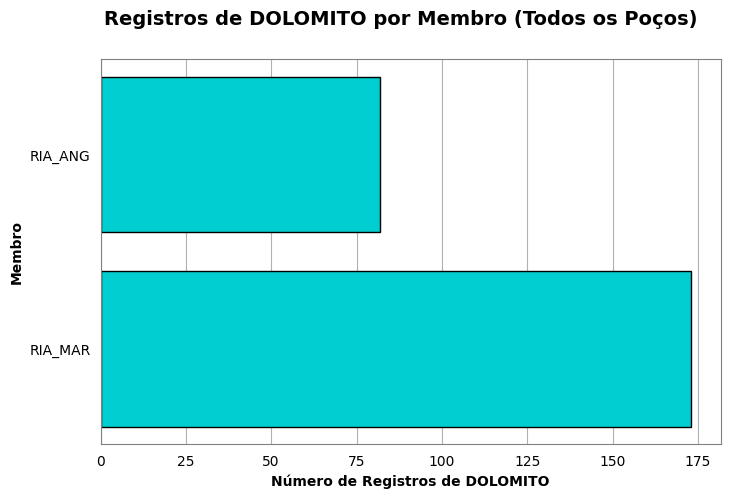

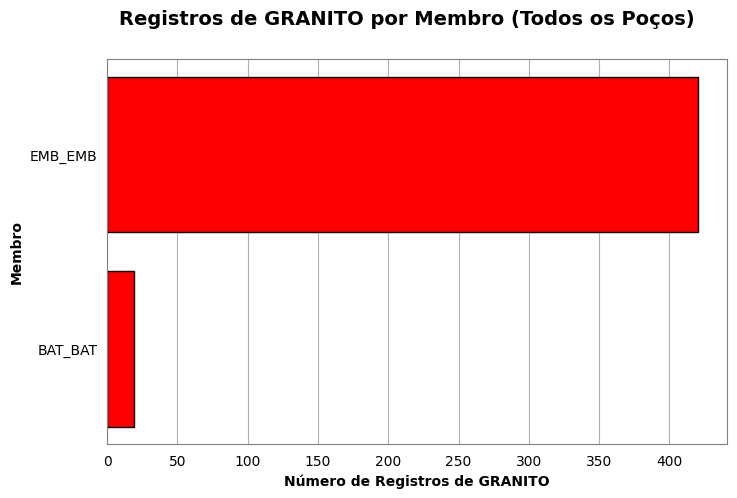

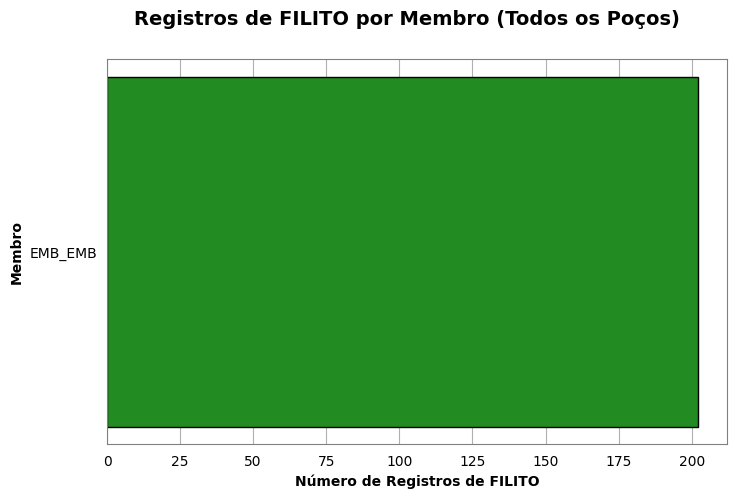

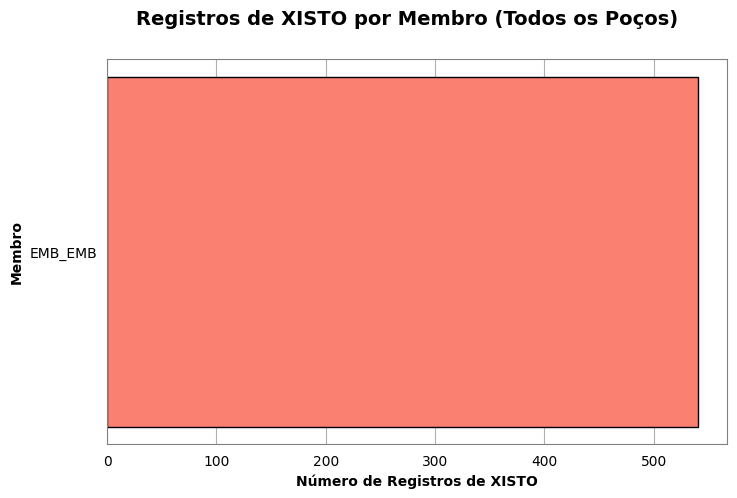

In [12]:
import os
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt

# Supondo que você tenha as funções e dados definidos, como criar_grafico_registros_litologia_membro, litologias_cores, e dados

# Caminho da pasta onde os arquivos PDF serão armazenados
output_folder = 'Litologias-membro-poco/'
os.makedirs(output_folder, exist_ok=True)

for key, value in litologias_cores.items():
    # Define o nome do arquivo PDF para a litologia atual
    pdf_filename = os.path.join(output_folder, f'{key}.pdf')
    
    with PdfPages(pdf_filename) as pdf:
        fig_1 = criar_grafico_todos_registros_litologia_membro(dados, key, value)
        for poco in dados.keys():
            # Cria o gráfico para a combinação atual de 'poco' e 'key'
            fig = criar_grafico_registros_litologia_membro(poco, key, value)
            pdf.savefig(fig)  # Salva o gráfico no arquivo PDF
            plt.close(fig)  # Fecha o gráfico para liberar memória